In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
import contextily as ctx
from torch.optim.lr_scheduler import ReduceLROnPlateau
import plotly.graph_objs as go
import pandas as pd

In [14]:
X_train, y_train = torch.load('train_data.pt')
X_test, y_test = torch.load('test_data.pt')

In [15]:
X_train.head()

,speed,direction,altitude,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,lon,lat
1429,"[0.9051045791951539, 0.36488358527490866, 1.08...","[213.59247189761314, 50.80250216324066, 183.13...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0256121158599854, 1.0256121158599854, 1.025...","[0.3663296103477478, 0.3663296103477478, 0.366...","[0.5513201951980591, 0.5513201951980591, 0.551...","[0.07311602681875229, 0.07311602681875229, 0.0...","[-0.8946580290794373, -0.8946580290794373, -0....","[-0.2698259651660919, -0.2698259651660919, -0....","[-0.2163011133670807, -0.2163011133670807, -0....","[0.7204081416130066, 0.7204081416130066, 0.720...","[-0.02065705507993698, -0.02065705507993698, -...","[-0.9212825894355774, -0.9212825894355774, -0....","[116.3014351480511, 116.30150542563571, 116.30...","[39.96877567574513, 39.96878432818993, 39.9686..."
67,"[3.0108908393211498, 3.0108908393211498, 6.122...","[288.5357135551421, 322.5141456425275, 357.111...","[124.671916010499, 124.671916010499, 124.67191...","[0.46460089087486267, 0.46460089087486267, 0.6...","[0.1521492749452591, 0.1521492749452591, 0.346...","[0.540621280670166, 0.540621280670166, 0.62186...","[0.1624462604522705, 0.1624462604522705, 0.175...","[-0.4449816346168518, -0.4449816346168518, -0....","[-0.14718317985534668, -0.14718317985534668, -...","[-0.07059749215841293, -0.07059749215841293, -...","[0.5213332176208496, 0.5213332176208496, 0.588...","[-0.09077417105436325, -0.09077417105436325, -...","[-0.5483834147453308, -0.5483834147453308, -0....","[116.44731858033349, 116.44676390819669, 116.4...","[39.92016651131108, 39.92061223955805, 39.9216..."
1703,"[18.850246964938353, 23.816038343712744, 18.26...","[335.4858884561994, 329.48940661299076, 332.93...","[133.0, 122.0, 122.0, 116.0, 96.0, 100.0, 108....","[0.5349023342132568, 0.17976602911949158, 0.17...","[-0.6651846170425415, -0.42298227548599243, -0...","[0.12552687525749207, 0.1509539932012558, 0.15...","[-0.7920409440994263, -0.523102879524231, -0.5...","[-0.0477927140891552, 0.21758998930454254, 0.2...","[-0.5892762541770935, -0.2122603952884674, -0....","[0.8264040946960449, 0.6603919267654419, 0.660...","[0.2962551712989807, 0.07370658218860626, 0.07...","[0.112643763422966, 0.001559823751449585, 0.00...","[0.5791710615158081, 0.5857739448547363, 0.585...","[116.32082929368482, 116.31593850769198, 116.3...","[40.05726168456284, 40.06362562880345, 40.0664..."
3816,"[9.795189633300517, 9.795189633300517, 16.3215...","[262.22607388023835, 266.33142518408016, 215.0...","[492.0, 486.0, 134.0, 157.0, 154.0, 155.0, 153...","[0.8499414920806885, 0.8499414920806885, 0.849...","[0.020452499389648438, 0.020452499389648438, 0...","[0.30733856558799744, 0.30733856558799744, 0.3...","[-0.10952486097812653, -0.10952486097812653, -...","[-0.7700713872909546, -0.7700713872909546, -0....","[-0.33048173785209656, -0.33048173785209656, -...","[0.04297511279582977, 0.04297511279582977, 0.0...","[0.5876412987709045, 0.5876412987709045, 0.587...","[0.03853924944996834, 0.03853924944996834, 0.0...","[-0.5446991920471191, -0.5446991920471191, -0....","[116.35840071808049, 116.35726092090769, 116.3...","[39.98660396412316, 39.98634070857769, 39.9861..."
221,"[1.4790322663962254, 0.8986250414306074, 0.301...","[44.764987305878094, 111.28007895606697, 113.5...","[115.0, 158.0, 132.0, 134.0, 140.0, 140.0, 134...","[0.8768018484115601, 0.8768018484115601, 0.876...","[-0.234211266040802, -0.234211266040802, -0.23...","[0.43553626537323, 0.43553626537323, 0.4355362...","[-0.04397360235452652, -0.04397360235452652, -...","[-0.7363857626914978, -0.7363857626914978, -0....","[-0.3531106412410736, -0.3531106412410736, -0....","[0.2993607223033905, 0.2993607223033905, 0.299...","[0.7298173904418945, 0.7298173904418945, 0.729...","[0.03381585702300072, 0.03381585702300072, 0.0...","[-0.3639601469039917, -0.3639601469039917, -0....","[116.42498845860966, 116.4256920976405, 116.42...","[39.9670260052923, 39.9666455530600

In [16]:
y_train.head()

1429      [116.3011138343592, 39.96856171989006]
67       [116.38219285324135, 39.94227600567081]
1703     [116.23806464583063, 40.17018442143825]
3816    [116.34338976362467, 39.896206354123585]
221      [116.3606775007658, 40.069062889647206]
Name: y, dtype: object

In [17]:
def plot_trajectories(trajectories):
    if isinstance(trajectories[0], LineString):
        trajectories = [list(trajectory.coords) for trajectory in trajectories]

    fig = go.Figure()
    for trajectory in trajectories:
        lon = [point[0] for point in trajectory]
        lat = [point[1] for point in trajectory]

        fig.add_trace(go.Scattermapbox(
            mode="markers+lines",
            lon=lon,
            lat=lat,
            marker={'size': 10}
        ))

    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox_zoom=10,
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
    )

    fig.show()

In [18]:
def plot_traj_and_point(traj, point):
    assert isinstance(traj, list)
    
    lon = [point[0] for point in traj]
    lat = [point[1] for point in traj]
    
    fig = go.Figure()
    fig.add_trace(go.Scattermapbox(
        mode="markers+lines",
        lon=lon,
        lat=lat,
        marker={'size': 10}
    ))
    
    fig.add_trace(go.Scattermapbox(
        mode="markers",
        lon=[point[0]],
        lat=[point[1]],
        marker={'size': 10}
    ))
    
    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox_zoom=10,
        margin={"r": 0, "t": 0, "l": 0, "b": 0}
    )
    
    fig.show()

In [32]:
traj = list(zip(X_train.iloc[2, 13], X_train.iloc[2, 14]))
point = y_train.iloc[2]

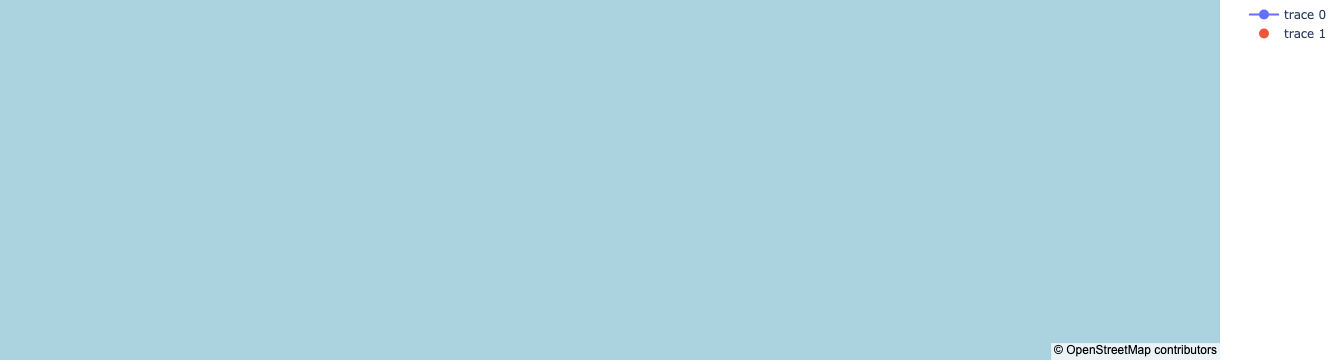

In [33]:
plot_traj_and_point(traj, point)

In [38]:
class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        X_seq = self.X.iloc[idx].values
        y_val = self.y.iloc[idx]
        
        X_tensor = torch.tensor([item for item in X_seq], dtype=torch.float32)
        y_tensor = torch.tensor(y_val, dtype=torch.float32)
        
        return X_tensor, y_tensor

In [39]:
values = X_train.iloc[2].to_list()

new_df = pd.DataFrame([values], columns=X_train.columns)
new_y = pd.Series([y_train.iloc[2]], name='target')

In [40]:
train_dataset = SequenceDataset(new_df, new_y)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = SequenceDataset(new_df, new_y)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [41]:
class TrajectoryLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TrajectoryLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [42]:
# Hyperparameters
input_size = 30
hidden_size = 128  # Rozmiar warstwy ukrytej
num_layers = 8  # Liczba warstw LSTM
output_size = 2  # Liczba wyjść (lon, lat)
num_epochs = 1500
learning_rate = 0.001

# Inicjalizacja modelu, funkcji straty i optymalizatora
model = TrajectoryLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

# Przeniesienie modelu na GPU, jeśli jest dostępny
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


TrajectoryLSTM(
  (lstm): LSTM(30, 128, num_layers=8, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [43]:
train_losses = []
val_losses = []

# Pętla trenowania
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.float())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    scheduler.step(train_loss)
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    # Walidacja po każdej epoce
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets.float())
            val_loss += loss.item()
    
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    # print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

Epoch [1/1500], Training Loss: 78.1539
Epoch [11/1500], Training Loss: 76.0958
Epoch [21/1500], Training Loss: 73.3941
Epoch [31/1500], Training Loss: 71.5239
Epoch [41/1500], Training Loss: 69.9520
Epoch [51/1500], Training Loss: 68.4385
Epoch [61/1500], Training Loss: 66.9511
Epoch [71/1500], Training Loss: 65.4724
Epoch [81/1500], Training Loss: 64.0164
Epoch [91/1500], Training Loss: 62.5835
Epoch [101/1500], Training Loss: 61.1685
Epoch [111/1500], Training Loss: 59.7680
Epoch [121/1500], Training Loss: 58.3793
Epoch [131/1500], Training Loss: 57.0002
Epoch [141/1500], Training Loss: 55.6290
Epoch [151/1500], Training Loss: 54.2646
Epoch [161/1500], Training Loss: 52.9058
Epoch [171/1500], Training Loss: 51.5520
Epoch [181/1500], Training Loss: 50.2026
Epoch [191/1500], Training Loss: 48.8569
Epoch [201/1500], Training Loss: 47.5146
Epoch [211/1500], Training Loss: 46.1753
Epoch [221/1500], Training Loss: 44.8387
Epoch [231/1500], Training Loss: 43.5046
Epoch [241/1500], Training 

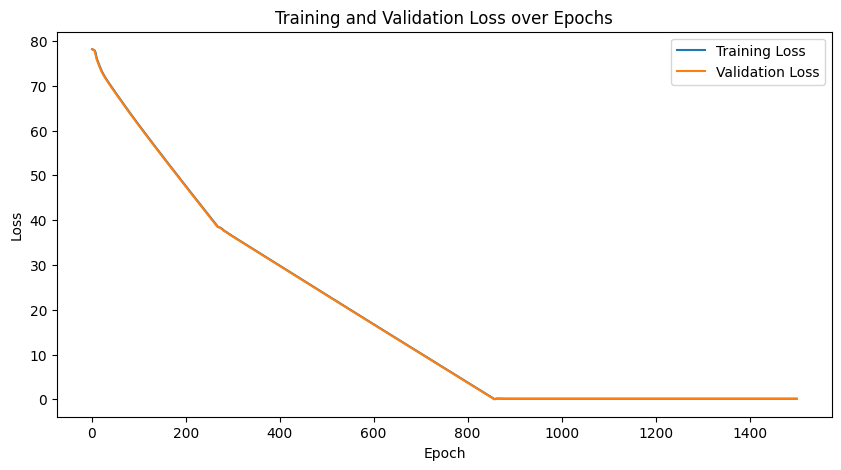

In [44]:
# Wizualizacja strat
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [45]:
preds = []
trues = []
for inputs, targets in test_loader:
    inputs = inputs.to(device)
    targets = targets.to(device)

    outputs = model(inputs)
    for i in range(1):
        print(f'Pred: {outputs[i].detach().cpu().numpy()}, True: {targets[i].detach().cpu().numpy()}')
    preds.append(outputs.detach().cpu().numpy())
    trues.append(targets.detach().cpu().numpy())

Pred: [116.48836   40.170185], True: [116.23807   40.170185]


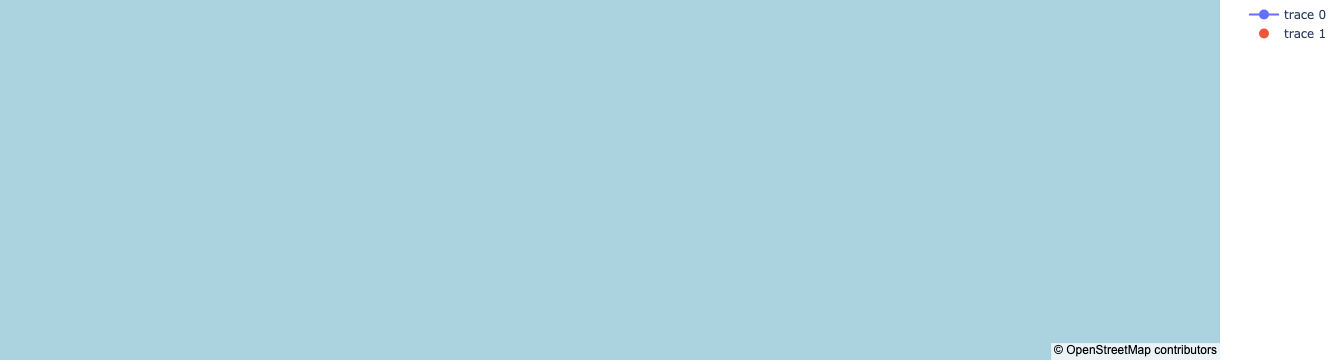

In [46]:
plot_traj_and_point(traj, [116.48836 , 40.170185])

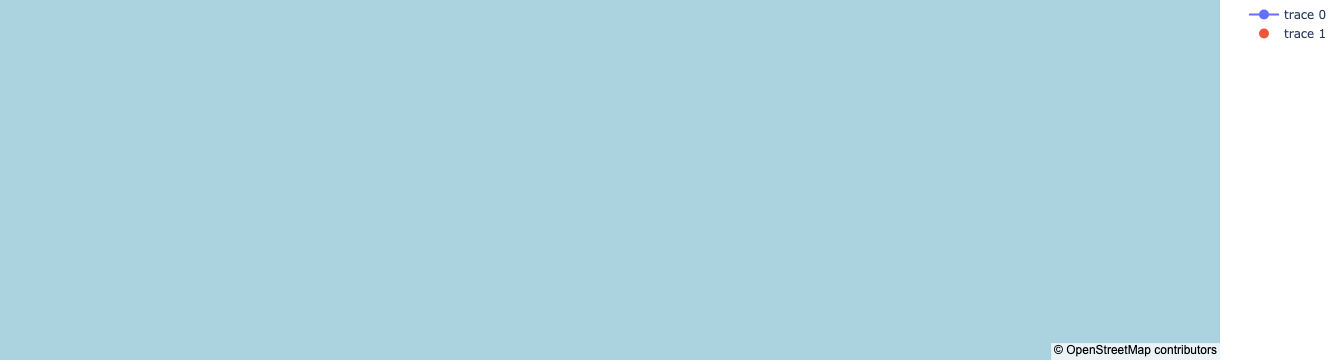

In [48]:
plot_traj_and_point(traj, [116.23807 ,  40.170185])
